In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xticks.bottom':True, 'ytick.left':True})

In [3]:
cwd = os.getcwd()
filename = cwd + '/winequality-red.csv'
data = pd.read_csv(filename)

In [4]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# check if we have null values
print('Null values: ')
data.isnull().values.any()

Null values: 


False

In [6]:
values_counts=data['quality'].value_counts()
print("These are the observed values for " + 'quality' + ":")
print(values_counts)

These are the observed values for quality:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [7]:
# describe variables
data.loc[:, data.columns != 'quality'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


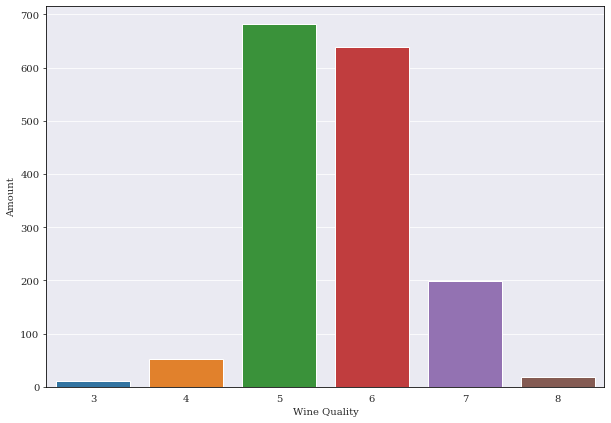

In [8]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'quality', data = data)
plt.xlabel('Wine Quality')
plt.ylabel('Amount')
plt.show()

(12, 0)

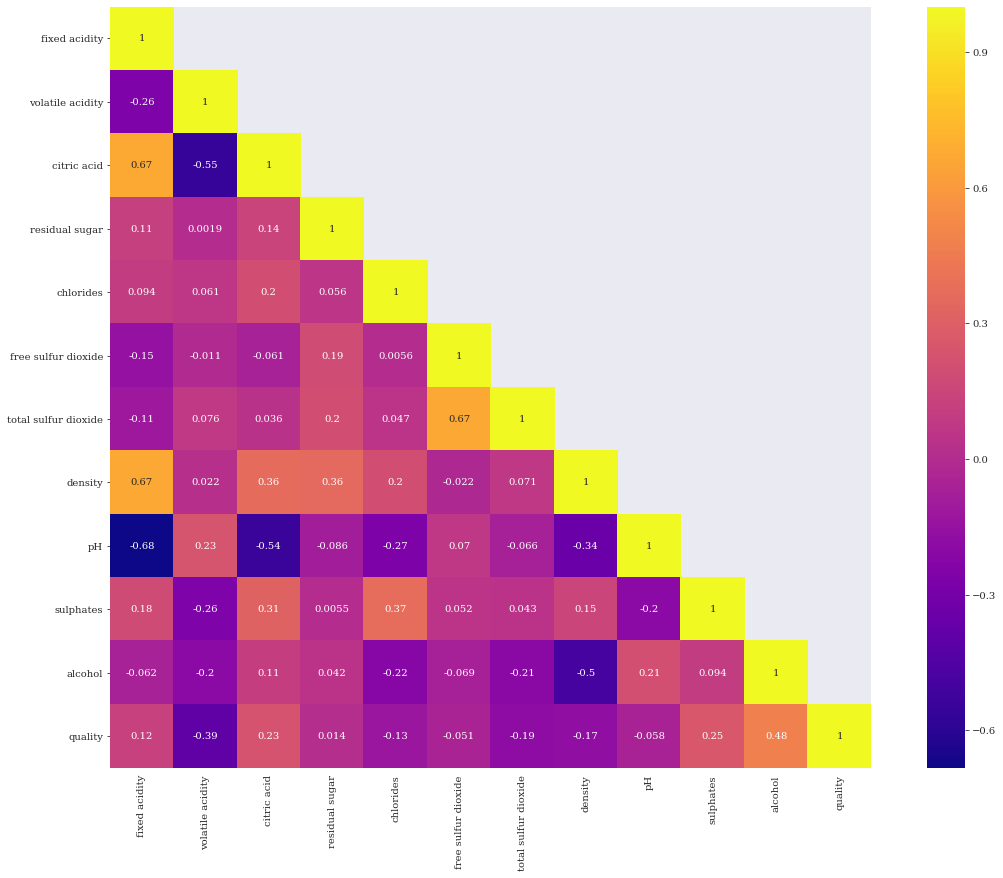

In [9]:
#corelation matrix.
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax =plt.subplots(figsize = (20,14))
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, cmap = 'plasma')
ax.set_ylim(12,0)


In [12]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [16]:
# test and training data
X_data = data.drop(columns = ['quality'])
y_data = data.loc[:,'quality']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 1)



In [17]:
print('Percent of each score in the training data')
print(y_train.value_counts()/y_train.shape[0])

Percent of each score in the training data
5    0.422987
6    0.394058
7    0.132134
4    0.031274
8    0.012510
3    0.007037
Name: quality, dtype: float64


PC       % Variance
1        94.5396 
2        4.9213  
3        0.2805  
4        0.1574  
5        0.0935  
6        0.0036  
7        0.002   
8        0.001   
9        0.0009  
10       0.0001  
11       0.0     


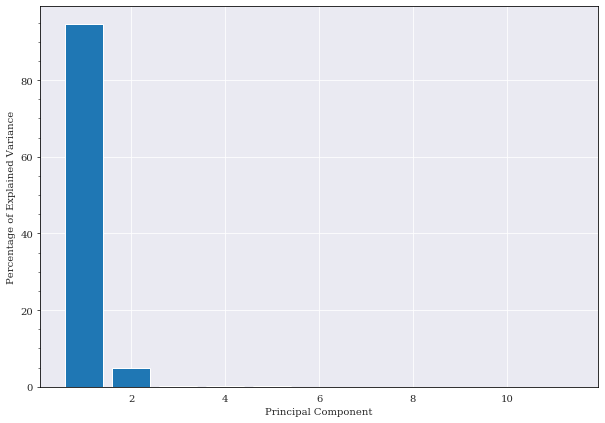

In [18]:
# PCA ANALYSIS
from sklearn.decomposition import PCA

pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fmt = '{:<8} {:<8}'
print(fmt.format('PC', '% Variance'))
for i in range(len(per_var)):
    print(fmt.format(i+1, np.round(per_var[i], decimals = 4)))

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()

In [19]:
# change to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [20]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [21]:
# one hot encoding
enc = OneHotEncoder(categories = 'auto')
y_train_hot = enc.fit_transform(y_train).toarray()
y_test_hot = enc.fit_transform(y_test).toarray()
print(y_train_hot[:10])
print(y_test_hot.shape)
print(X_train.shape)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
(320, 6)
(1279, 11)


In [22]:
# Scale Data
trainScaler = StandardScaler()
trainScaler.fit(X_train)
X_train = trainScaler.transform(X_train)
X_test = trainScaler.transform(X_test)

Data now ready for analysis

# ANALYSIS

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [30]:
models = [RandomForestClassifier(random_state = 1), DecisionTreeClassifier(random_state = 1), 
          MLPClassifier(max_iter = 1000, random_state = 1), KNeighborsClassifier()]
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'K-Neighbors']

In [31]:
acc = np.zeros_like(models)
for i in range(len(models)):
    solver = models[i]
    solver.fit(X_train, y_train_hot)
    predict = solver.predict(X_test)
    acc[i] = accuracy_score(predict, y_test_hot)
    print('{:<8} {:<8}'.format(model_names[i],acc[i]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest 0.54375 
Decision Tree 0.64375 
Neural Network 0.51875 
K-Neighbors 0.540625


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# NEURAL NET

In [33]:
params_dict ={'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive'], 
              'hidden_layers_sizes':[(100),(100,10),(100,100),(1000,100)]}

In [ ]:
opt_NN = GridSearchCV(estimator = )

In [64]:
NN = MLPClassifier(hidden_layer_sizes=(100,10), activation='relu', solver='sgd', batch_size = 100, 
                       max_iter=5000, alpha=0.001, learning_rate = 'constant', random_state = 1)
    
NN.fit(X_train, y_train_hot)
prediction = NN.predict(X_test)
prob = NN.predict_proba(X_test)
print(prediction[:20])
print(prob[:10])
score = NN.score(X_test,y_test_hot)
print(score)

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[1.24647748e-06 6.35087758e-04 3.25135716e-03 5.67824426e-01
  4.68743713e-01 6.25050950e-03]
 [2.35610765e-04 1.75014739e-03 1.12941233e-02 9.94695176e-01
  7.01096616e-04 2.25091349e-05]
 [2.72573031e-03 6.78064185e-03 9.99697581e-01 3.28042979e-05
  2.00986460e-05 2.53714279e-07]
 [5.66093197e-08 1.63119608e-04 5.09095019e-03 9.06832966e-02
  7.71638680e-01 1.34127098e-01]
 [2.15193816e-05 4.20997575e-03 6.47258571e-01 2.47431134e-01
  2.18448850e-02 1.27282626e-04]
 [1.55866271e-04 2.74482666e-03 9.83927195e-01 1.95497518e-02
  6.32236328e-05 4.74167310e-07]
 [8.98964734e-04 3.66958536e-02 9.99828881e-01 4.52619576e-06
  5.66715736e-02 2.37559609e-04]
 [2.61163283e-06 3.62359391e-03 5.

In [140]:
# just checking 
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
accuracy = 0
for tr_idx, val_idx in kf.split(X_train):          
    NN = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='lbfgs', batch_size = 100, 
                       max_iter=10, alpha=0.001, learning_rate = 'constant', random_state = 1)
    
    NN.fit(X_train[tr_idx], y_train[tr_idx])
    prediction = NN.predict(X_train[val_idx])
    print(prediction[:10])
    score = NN.score(X_train[val_idx],y_train[val_idx])
    accuracy += score
    
accuracy = accuracy/5
print(accuracy)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 

In [136]:
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN_sklearn = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='lbfgs', batch_size = 100, 
                               max_iter=10, alpha=lam, learning_rate_init=eta, random_state = 1)
            NN.fit(X_train[tr_idx], y_train[tr_idx,0])
            score = NN.score(X_train[val_idx],y_train[val_idx,0])
            accuracy += score
        accuracy = accuracy/5
        test_accuracy_NN_sklearn[i][j] = accuracy


In [128]:
print(5*np.logspace(-5, -1, 5))
print(np.logspace(-5,-1,5))


[5.e-05 5.e-04 5.e-03 5.e-02 5.e-01]
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
